<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [11]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import statsmodels.api as sm
import scipy.stats as stats

#### Read the data

Load the csv file and print the first five observations.

In [12]:
# type your code here
df = pd.read_csv("seedtype_data.csv")
df.head()

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.76,13.38,5.073,3.155,4.830,0.0
1,12.13,13.73,5.394,3.745,5.220,0.0
2,14.86,14.67,NaN,3.258,5.351,0.0
3,15.69,14.75,5.527,3.514,5.046,0.0
4,19.94,16.92,6.675,3.763,6.550,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              199 non-null    float64
 1   Perimeter         199 non-null    float64
 2   Kernel_len        193 non-null    float64
 3   Kernel_width      199 non-null    float64
 4   Kernelgroove_len  199 non-null    float64
 5   Type              199 non-null    float64
dtypes: float64(6)
memory usage: 9.6 KB


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
df.shape

(202, 6)

In [15]:
df.isnull().sum()

Area                3
Perimeter           3
Kernel_len          9
Kernel_width        3
Kernelgroove_len    3
Type                3
dtype: int64

In [16]:
df = df.drop_duplicates()
df.shape

(200, 6)

In [17]:
df = df.dropna()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

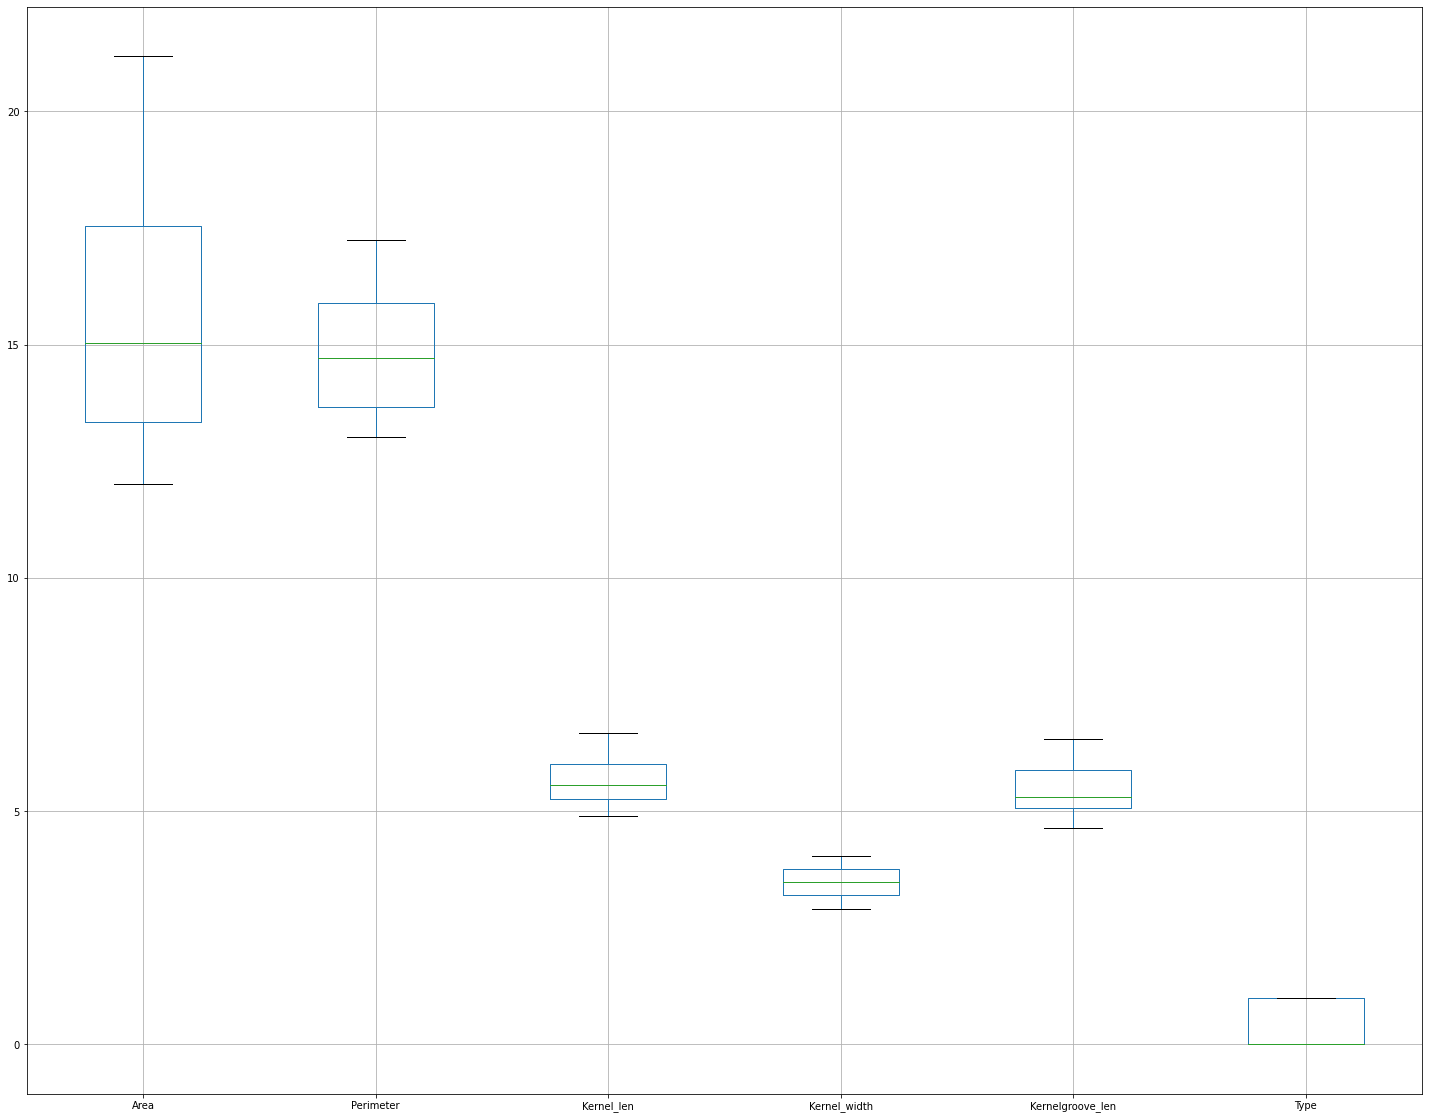

In [18]:
# type your code here
plt.figure(figsize=(25,20))
df.boxplot()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
print(df["Kernel_len"].skew())
df["Kernel_len"] = df["Kernel_len"].fillna(df["Kernel_len"].median())

0.47732116514232165


In [20]:
df.isnull().sum()

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df["Type"].value_counts()

0.0    123
1.0     70
Name: Type, dtype: int64

In [23]:
# type your code here
df_feature = df.drop("Type" , axis = 1)

df_target = df["Type"]

X_train_full  ,X_test_full ,y_train_full ,y_test_full = train_test_split(df_feature , df_target ,
                                                                         test_size=0.2 , random_state=10)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

gdboost_classifier = GradientBoostingClassifier(n_estimators=250 , max_depth=2 , random_state=8)

gdboost_classifier = gdboost_classifier.fit(X_train_full , y_train_full)

y_pred_full  = gdboost_classifier.predict(X_test_full)

tn , fp , fn , tp = confusion_matrix(y_test_full , y_pred_full).ravel()

print("Sensitivity: ", tp/(tp+fn))
print("Precision: ",tp/(tp+fp))

Sensitivity:  1.0
Precision:  0.9411764705882353


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

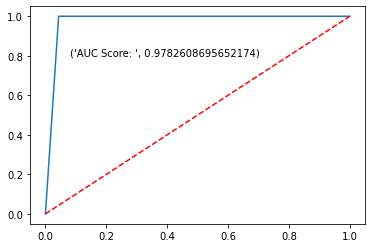

In [28]:
# type your code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , roc_curve , roc_auc_score

adbosst_classifier = AdaBoostClassifier(n_estimators=80 , random_state=8)

adbosst_classifier = adbosst_classifier.fit(X_train_full , y_train_full)

y_pred = adbosst_classifier.predict(X_test_full)

fpr , tpr , threshold = roc_curve(y_test_full , y_pred)

plt.plot(fpr , tpr)
plt.plot([0,1] , "r--")

plt.text(x = 0.08 , y=0.8 , s = ("AUC Score: ",roc_auc_score(y_test_full ,y_pred)))

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [30]:
# type your code here
from sklearn.model_selection import GridSearchCV

tuned_para = [{"max_depth" : [2, 3, 4, 5, 6, 7, 8]}]
gdboost = GradientBoostingClassifier(learning_rate=180,random_state=8)

tree_grid = GridSearchCV(estimator=gdboost , param_grid=tuned_para , cv = 3 , n_jobs=-1)
tree_grid.fit(X_train_full , y_train_full)

print("The optimal maximum depth is: ", tree_grid.best_params_ , "\n")

The optimal maximum depth is:  {'max_depth': 6} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
from xgboost import XGBClassifier

xgboost_classifier = XGBClassifier(learning_rate = 0.4 , gamma = 3)

xgboost_classifier = xgboost_classifier.fit(X_train_full , y_train_full)

y_pred = xgboost_classifier.predict(X_test_full)

tn , fp , fn , tp = confusion_matrix(y_test_full , y_pred).ravel()

print("Accuracy:" ,(tp+tn)/(tn+fp+fn+tp))


[09:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9743589743589743


C:\Users\juhib\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
X_train , X_test , y_train , y_test = train_test_split(df_feature , df_target , test_size=0.3 , random_state=8)

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

base_learner = [('k-NN',KNeighborsClassifier(n_neighbors=9)),
               ('Naive bayes',GaussianNB())]

stack_model = StackingClassifier(estimators=base_learner,final_estimator=AdaBoostClassifier(random_state=8),n_jobs=-1)

stack_model.fit(X_train , y_train)

y_pred = stack_model.predict(X_test)

print("AUC Score: ",roc_auc_score(y_test , y_pred))

AUC Score:  0.9285714285714286


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
base_learner = [('k-NN',KNeighborsClassifier(n_neighbors=9)),
               ('Naive bayes',GaussianNB())]

stack_model = StackingClassifier(estimators=base_learner,final_estimator=XGBClassifier(random_state=8),n_jobs=-1)

stack_model.fit(X_train , y_train)

y_pred = stack_model.predict(X_test)

print("AUC Score: ",roc_auc_score(y_test , y_pred))

[09:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Score:  0.9285714285714286


C:\Users\juhib\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
